Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Rescaling, Conv2D, MaxPooling2D, Flatten
import glob

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("gdrive/MyDrive/Upgrad/CNN Assignment/Train")
data_dir_test = pathlib.Path("gdrive/MyDrive/Upgrad/CNN Assignment/Test")

Run the below Cell to remove the Augmentator files if present in the respective classes folder.

In [4]:
## Move Files from Train folders to Output folders

for cls in ['actinic keratosis',  'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma',
            'vascular lesion']:
            for y in glob.iglob(os.path.join(data_dir_train, '*',  f'{cls}*.jpg')):
              y=pathlib.Path(y)
              os.remove(y)
              # os.remove(os.path.join(os.path.dirname(y), 'output'))

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             batch_size=batch_size,
                                                             image_size=(img_height,img_width),
                                                             seed=123,
                                                             validation_split=0.2,
                                                             subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             batch_size=batch_size,
                                                            image_size=(img_height,img_width),
                                                             seed=123,
                                                             validation_split=0.2,
                                                             subset='validation')

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

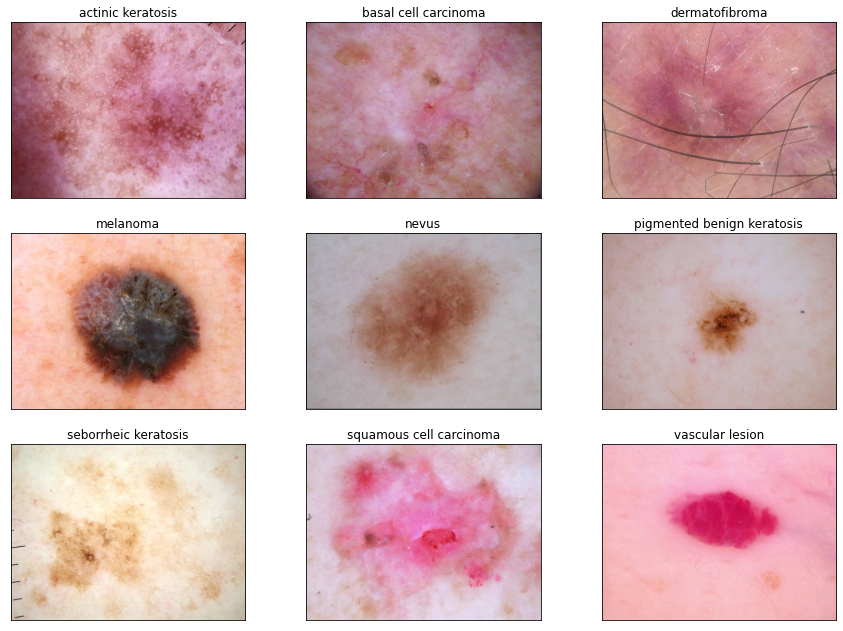

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=[15,11])
for i, cls in enumerate(class_names,1):
    plt.subplot(3,3,i, xticks=[],yticks=[])
    image=PIL.Image.open(list(data_dir_train.glob(f'{cls}/*.jpg'))[0])
    plt.imshow(image)
    plt.title(cls)
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here

model = Sequential()

#Normalize Layer
model.add(Rescaling(1./255, input_shape=(img_height, img_width,3)))

# first conv layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# second conv layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))


# softmax layer
model.add(Dense(len(class_names),activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 84, 84, 64)        36928     
                                                        

### Train the model

Check Shape of the model

In [15]:
# tf.keras.utils.plot_model(model)

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 317s 1s/step - loss: 2.0517 - accuracy: 0.2333 - val_loss: 1.8069 - val_accuracy: 0.3154
Epoch 2/20
56/56 [==============================] - 9s 154ms/step - loss: 1.7101 - accuracy: 0.3739 - val_loss: 1.7245 - val_accuracy: 0.3647
Epoch 3/20
56/56 [==============================] - 9s 154ms/step - loss: 1.5631 - accuracy: 0.4503 - val_loss: 1.4888 - val_accuracy: 0.4720
Epoch 4/20
56/56 [==============================] - 9s 153ms/step - loss: 1.4983 - accuracy: 0.4676 - val_loss: 1.4886 - val_accuracy: 0.4743
Epoch 5/20
56/56 [==============================] - 9s 153ms/step - loss: 1.4526 - accuracy: 0.4905 - val_loss: 1.5891 - val_accuracy: 0.4564
Epoch 6/20
56/56 [==============================] - 9s 153ms/step - loss: 1.3404 - accuracy: 0.5402 - val_loss: 1.4592 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 9s 153ms/step - loss: 1.2393 - accuracy: 0.5714 - val_loss: 1.5505 - val_accuracy: 0.5190
Epoch 8

### Visualizing training results

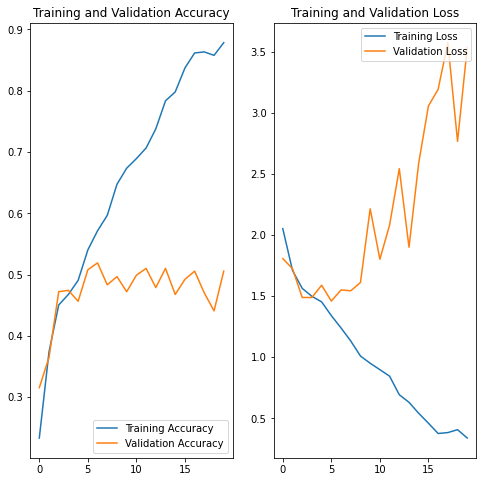

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

- We can see that the Model clearly Overfits.
- The Training and Validation Accuracy difference is more than 5%
- In addition, the Validation loss and Training loss moves in different directions towards the end
- To help avoid overfitting, we can try to add **L2-regularization** or we can use **Data Augmentation using RandomFlip, RandomeRotation, RandomZoom**


In [18]:
def random_invert_img(x, p=0.5):
    if  tf.random.uniform([]) < p:
        x = (255-x)
    else:
        x
    return x

def random_invert(factor=0.5):
    return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invert = random_invert()

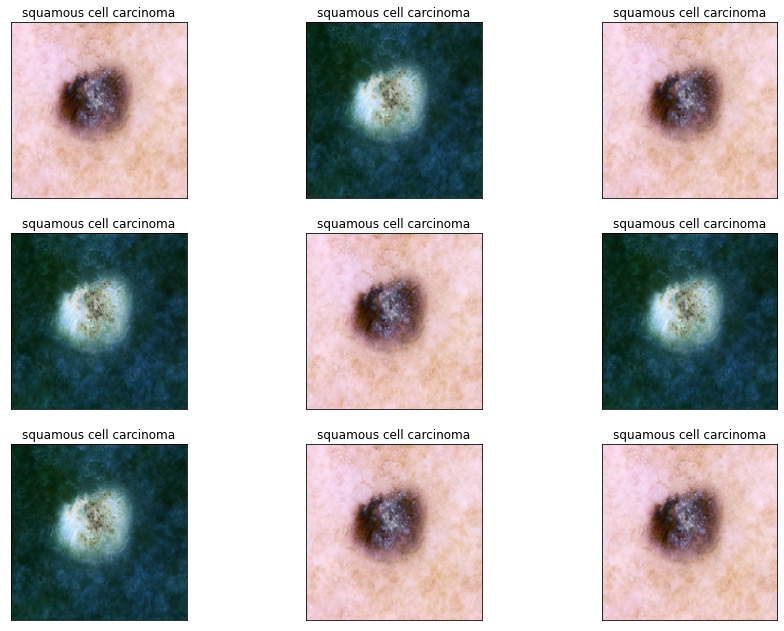

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=[15,11])

for image, label in train_ds.take(1):
    for i in range(9):
        augmented_images = random_invert(image)
        plt.subplot(3, 3, i + 1, xticks=[],yticks=[])
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[label[0]])        
plt.show()

In [20]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation =Sequential()
data_augmentation.add(layers.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)))
data_augmentation.add(layers.RandomRotation(0.2,fill_mode='wrap'))
data_augmentation.add(layers.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')) 

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential()

#Add Data Augment Layer TOO
model.add(data_augmentation)

#Normalize Layer
model.add(Rescaling(1./255, input_shape=(img_height, img_width,3)))

# first conv layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(len(class_names),activation='softmax'))

### Compiling the model

In [22]:
## Your code goes here
model.compile(metrics=['accuracy'],
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer='adam')

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
    train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 11s 170ms/step - loss: 2.3118 - accuracy: 0.1685 - val_loss: 2.0575 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 9s 165ms/step - loss: 2.0368 - accuracy: 0.1975 - val_loss: 1.9435 - val_accuracy: 0.2192
Epoch 3/20
56/56 [==============================] - 9s 164ms/step - loss: 1.9859 - accuracy: 0.2310 - val_loss: 2.0020 - val_accuracy: 0.2371
Epoch 4/20
56/56 [==============================] - 9s 164ms/step - loss: 1.9595 - accuracy: 0.2400 - val_loss: 1.9328 - val_accuracy: 0.2685
Epoch 5/20
56/56 [==============================] - 9s 163ms/step - loss: 1.9351 - accuracy: 0.2433 - val_loss: 1.9255 - val_accuracy: 0.2953
Epoch 6/20
56/56 [==============================] - 9s 163ms/step - loss: 1.9154 - accuracy: 0.2528 - val_loss: 1.8550 - val_accuracy: 0.3020
Epoch 7/20
56/56 [==============================] - 9s 164ms/step - loss: 1.8877 - accuracy: 0.2952 - val_loss: 1.8102 - val_accuracy: 0.3132
Epoch

### Visualizing the results

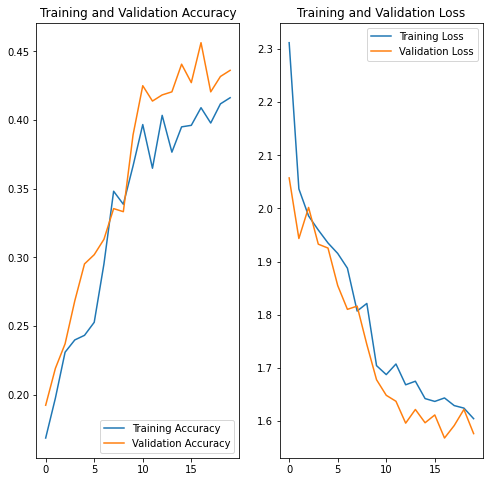

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- As seen from the above graphs, definetly the problem with overfitting is resolved now.
- The validation and trained data accuracy goes neck to neck.
- The loss for validation and trained data is also similar
- It looks like the model have started underfitting as the training accuracy has dropped from the previous model. We can try adding more images to help improve the model

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [28]:
## Your code goes here.

length =dict()
for cls in class_names:
    l=len(list(glob.iglob(f"{data_dir_train}/{cls}/*", recursive=True)))
    length[cls]=l
    
df=pd.DataFrame({'Class':length.keys(),'Number':length.values()}).sort_values(by='Number',ascending=False)
df
##  -- DONE

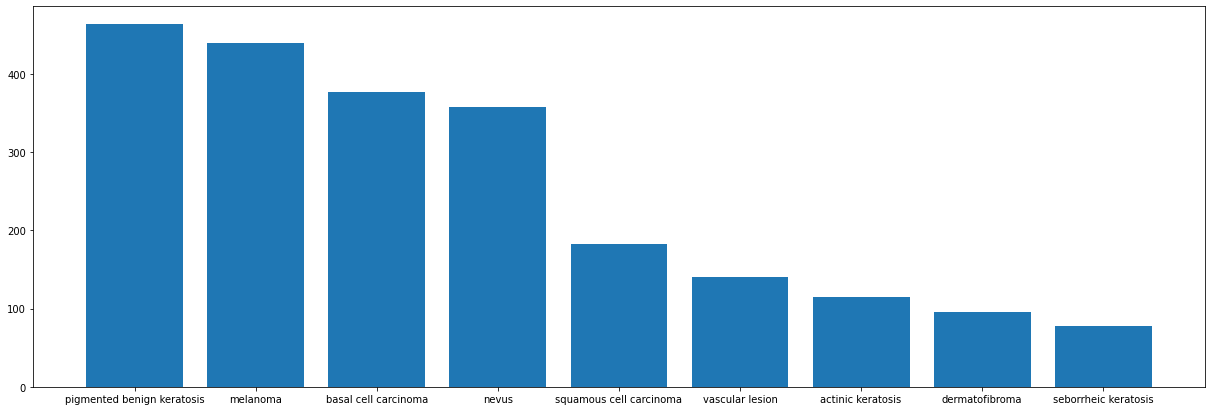

In [30]:
plt.figure(figsize=[21,7])
plt.bar(df['Class'],df['Number'])
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- **seborrheic keratosis has the least number of samples**

#### - Which classes dominate the data in terms proportionate number of samples?
- **pigmented benign keratosis, melanoma and basal cell carcinoma dominate in number of samples**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [31]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [32]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

    #500-df[i]

Initialised with 114 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad/CNN Assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F369F772210>: 100%|██████████| 500/500 [00:24<00:00, 20.42 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad/CNN Assignment/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F36249434D0>: 100%|██████████| 500/500 [00:24<00:00, 20.47 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad/CNN Assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F369F7500D0>: 100%|██████████| 500/500 [00:25<00:00, 19.32 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad/CNN Assignment/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F36248DBC10>: 100%|██████████| 500/500 [02:01<00:00,  4.12 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad/CNN Assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F369F768A10>: 100%|██████████| 500/500 [01:36<00:00,  5.20 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad/CNN Assignment/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F36248EB490>: 100%|██████████| 500/500 [00:21<00:00, 22.82 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad/CNN Assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F369FC65C10>: 100%|██████████| 500/500 [00:51<00:00,  9.69 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad/CNN Assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F369BF3D4D0>: 100%|██████████| 500/500 [00:20<00:00, 23.95 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/MyDrive/Upgrad/CNN Assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3719871A10>: 100%|██████████| 500/500 [00:22<00:00, 22.69 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [33]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [34]:
#Use Length from previous frequency distribution check
for cls in class_names:
    l=len(list(glob.iglob(f"{data_dir_train}/{cls}/output/*", recursive=True)))
    length[cls]+=l
    
df2=pd.DataFrame({'Class':length.keys(),'Number':length.values()}).sort_values(by='Number',ascending=False)
df2

,Class,Number
5,pigmented benign keratosis,963
3,melanoma,939
1,basal cell carcinoma,877
4,nevus,858
7,squamous cell carcinoma,682
8,vascular lesion,640
0,actinic keratosis,615
2,dermatofibroma,596
6,seborrheic keratosis,578


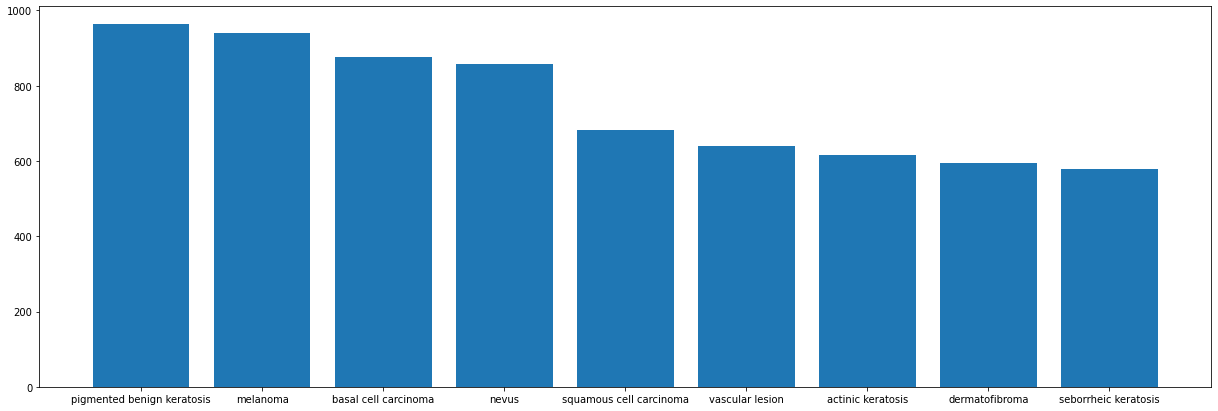

In [35]:
plt.figure(figsize=[21,7])
plt.bar(df2['Class'],df2['Number'])
plt.show()

In [36]:
# path_list = [x for x in glob.iglob(os.path.join(data_dir_train, '*/output/*.jpg'))]
# path_list

In [37]:
# lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# lesion_list_new

In [38]:
# dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [39]:
# df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)

In [40]:
# new_df['Label'].value_counts()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## Copy Files from Output Folder to the Train/class folders

In [41]:
for y in glob.iglob(os.path.join(data_dir_train, '*','output', '*.jpg')):
    y=pathlib.Path(y)
    os.rename(y, os.path.join(os.path.dirname(os.path.dirname(y)), os.path.basename(y)))

#### **Todo**: Train the model on the data created using Augmentor

In [42]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [43]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [44]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [45]:
## your code goes here
model = Sequential()

#Normalize Layer
model.add(Rescaling(1./255, input_shape=(img_height, img_width,3)))

# first conv layer
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(len(class_names),activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [46]:
## your code goes here
model.compile(
    metrics=['accuracy'],
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer='adam')

#### **Todo:**  Train your model

In [47]:
epochs = 30
## Your code goes here, use 30 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
# your model fit code

Epoch 1/30
169/169 [==============================] - 52s 281ms/step - loss: 2.1017 - accuracy: 0.2107 - val_loss: 1.7399 - val_accuracy: 0.3059
Epoch 2/30
169/169 [==============================] - 46s 263ms/step - loss: 1.7492 - accuracy: 0.3227 - val_loss: 1.7415 - val_accuracy: 0.3623
Epoch 3/30
169/169 [==============================] - 45s 255ms/step - loss: 1.6055 - accuracy: 0.3984 - val_loss: 1.4612 - val_accuracy: 0.4647
Epoch 4/30
169/169 [==============================] - 44s 254ms/step - loss: 1.5047 - accuracy: 0.4329 - val_loss: 1.3528 - val_accuracy: 0.5011
Epoch 5/30
169/169 [==============================] - 45s 256ms/step - loss: 1.3923 - accuracy: 0.4698 - val_loss: 1.3235 - val_accuracy: 0.5041
Epoch 6/30
169/169 [==============================] - 44s 254ms/step - loss: 1.3351 - accuracy: 0.4954 - val_loss: 1.2575 - val_accuracy: 0.5234
Epoch 7/30
169/169 [==============================] - 44s 253ms/step - loss: 1.2668 - accuracy: 0.5273 - val_loss: 1.1984 - val_ac

#### **Todo:**  Visualize the model results

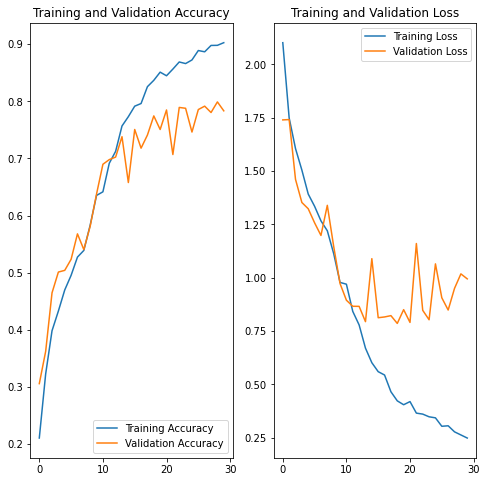

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- The Overfitting had come back again into the model. 
- Addition of images did helped as the accuracy increased but the model is overfitting.
- Hyperparameter tuning can be tried to reduce the overfitting. In addition, **BatchNormalization** and **regularization** techniques can be used further to help reduce overfitting further.




- Hyperparamter - Keras Tuner
- Transfer learning - VGGNet
- 
